<a href="https://colab.research.google.com/github/crodier1/data_science/blob/main/Wine_Reviews_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

In [ ]:
dataset = pd.read_csv('wine-reviews.csv')[['description', 'points']]

In [ ]:
dataset.points = (dataset.points >= 90).astype(int)

In [ ]:
train, val, test = np.split(dataset.sample(frac=1), [int(.85 * len(dataset)), int(.9 * len(dataset))])

In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
  df = dataframe.copy()
  labels = df.pop('points')
  df = df.description
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [ ]:
train = df_to_dataset(train)
val = df_to_dataset(val)
test = df_to_dataset(test)

In [ ]:
encoder = tf.keras.layers.TextVectorization(max_tokens=2000)
encoder.adapt(train.map(lambda text, label : text))

In [ ]:
model = tf.keras.Sequential([
                             encoder,
                             tf.keras.layers.Embedding(input_dim = len(encoder.get_vocabulary()),
                              output_dim = 32,
                              mask_zero= True
                             ),
                             tf.keras.layers.LSTM(32),
                             tf.keras.layers.Dense(32),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dropout(.4),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                             
                             ])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
              loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=['accuracy']
              )


In [ ]:
model.evaluate(train)

108/108 [==============================] - 22s 169ms/step - loss: 0.6929 - accuracy: 0.5318


[0.6929247379302979, 0.5317673683166504]

In [ ]:
model.evaluate(val)

7/7 [==============================] - 1s 154ms/step - loss: 0.6930 - accuracy: 0.5243


[0.692973792552948, 0.5243151783943176]

In [ ]:
history = model.fit(train, epochs=5, validation_data = val)

Epoch 1/5
108/108 [==============================] - 56s 473ms/step - loss: 0.4900 - accuracy: 0.7507 - val_loss: 0.3598 - val_accuracy: 0.8321
Epoch 2/5
108/108 [==============================] - 50s 463ms/step - loss: 0.3571 - accuracy: 0.8400 - val_loss: 0.3460 - val_accuracy: 0.8410
Epoch 3/5
108/108 [==============================] - 51s 470ms/step - loss: 0.3463 - accuracy: 0.8454 - val_loss: 0.3481 - val_accuracy: 0.8415
Epoch 4/5
108/108 [==============================] - 50s 461ms/step - loss: 0.3415 - accuracy: 0.8476 - val_loss: 0.3452 - val_accuracy: 0.8378
Epoch 5/5
108/108 [==============================] - 50s 461ms/step - loss: 0.3354 - accuracy: 0.8499 - val_loss: 0.3437 - val_accuracy: 0.8416


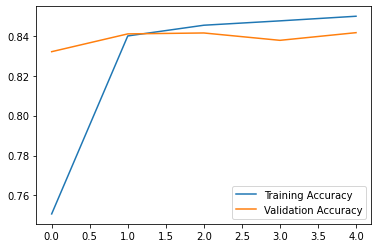

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

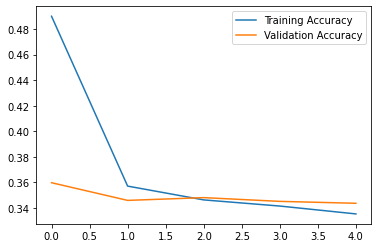

In [ ]:
plt.plot(history.history['loss'], label='Training Accuracy')
plt.plot(history.history['val_loss'], label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test)

13/13 [==============================] - 2s 164ms/step - loss: 0.3488 - accuracy: 0.8407


[0.34878095984458923, 0.8406677842140198]